## About Dataset

It's a survey of student's attitude on mathematics and jobs

In [ ]:
libname pfolio '/folders/myfolders/Assign1';

## Workflow

1. Metadata Table
2. Sampling (Spliting dataset 50/50 as Development and Validation) 3. Factor Analysis (Structure Exploration)
4. Structural Equation Modelling (Structure Confirmation)


In [2]:
proc print data=pfolio.attitude (obs=10);
run;

Obs,Seq,q2,q5,q7,q13,q18,q21,q38,q39,q42,q44,q46,q51
1,1,2,1,1,1,5,5,1,3,5,1,2,1
2,2,4,1,3,2,5,4,3,4,4,4,2,2
3,3,1,3,5,1,1,5,5,3,3,5,3,3
4,4,2,1,3,1,3,5,1,5,4,3,1,3
5,5,2,1,3,1,4,5,4,5,4,2,2,2
6,6,2,2,4,2,5,4,1,5,4,2,1,1
7,7,1,1,3,1,2,4,5,4,4,5,2,4
8,8,1,4,5,2,4,5,2,4,4,2,1,2
9,9,1,1,4,1,4,5,3,5,5,3,1,2
10,10,2,1,4,1,1,4,5,4,4,5,2,5


## Metadata Table

Variable  | Type| Length|Scales|Lablel
--------  | ----| ------|------|-------
Seq|Num|4|Continous|Sequence
q2|Num|4|Ordinal|q2: I can get along well without math
q5|Num|4|Ordinal|q5: Math not needed in most occupations
q7|Num|4|Ordinal|q7: Would like job that uses math
q13|Num|4|Ordinal|q13: Math not needed for everyday living
q18|Num|4|Ordinal|q18: Woman needs career as much as man
q21|Num|4|Ordinal|q21: Math is important to get a good job
q38|Num|4|Ordinal|q38: Men better scientists and engineers
q39|Num|4|Ordinal|q39: Math useful in everyday problems
q42|Num|4|Ordinal|q42: Math has practical use for jobs
q44|Num|4|Ordinal|q44: Boys have more natural math ability
q46|NUm|4|Ordinal|q46: Most dont use math in their jobs
q51|NUm|4|Ordinal|q51: Boys need more math than girls

## Descriptive Statistics

In [4]:
proc means data=pfolio.attitude (drop=seq) n nmiss min mean std max kurt skew;
run;

Variable,Label,N,N Miss,Minimum,Mean,Std Dev,Maximum,Kurtosis,Skewness
q2 q5 q7 q13 q18 q21 q38 q39 q42 q44 q46 q51,q2: I can get along well without math q5: Math not needed in most occupations q7: Would like job that uses math q13: Math not needed for everyday living q18: Woman needs career as much as man q21: Math is important to get a good job q38: Men better scientists and engineers q39: Math useful in everyday problems q42: Math has practical use for jobs q44: Boys have more natural math ability q46: Most dont use math in their jobs q51: Boys need more math than girls,1853 1853 1853 1853 1853 1853 1853 1853 1853 1853 1853 1853,0 0 0 0 0 0 0 0 0 0 0 0,1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000,2.2266595 2.1451700 3.1090124 2.0949811 3.7269293 4.0550459 2.7533729 3.8532110 3.7495953 2.5855370 2.3799244 2.4732866,1.1531727 1.2756968 1.1187532 1.1176194 1.0908579 0.9688411 1.2164041 0.9189843 0.8761947 1.1453947 1.0367265 1.1051440,5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000 5.0000000,-0.2569393 -0.2249942 -0.5338850 0.000867483 0.2032456 0.9533071 -0.7287661 0.9232513 1.1376864 -0.4120987 -0.1494287 -0.3802644,0.7789185 0.9578181 -0.1090414 0.9088809 -0.8248575 -1.0944963 0.2547636 -0.9216925 -0.8990556 0.4133091 0.6353056 0.4689246


No missing values ­ data looks pretty clean. Further analysis can be done to assess the frequency of all variables to check the response rate of all the questions ­ but due to lack of scale description, interpretaion won't be possible.

## Sampling (Spliting dataset 50/50 as Development and Validation)

In [ ]:
proc surveyselect data = pfolio.attitude out=sample
seed=20180101 method=srs samprate=.5 outall noprint ;
run;
data dev val;
set sample ;
if selected=1 then output dev;
else output val;
run;

## Factor Analysis

Factor analysis would be performed on the DEV sample to explore the underlying structure


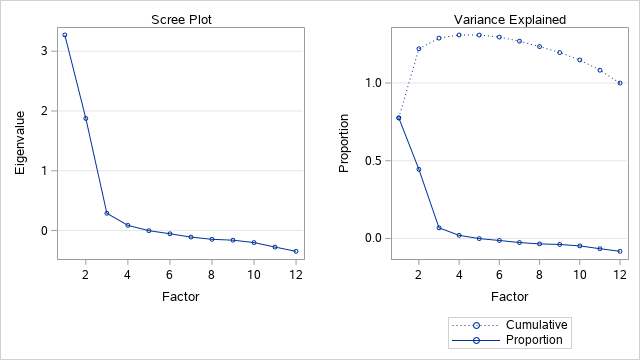
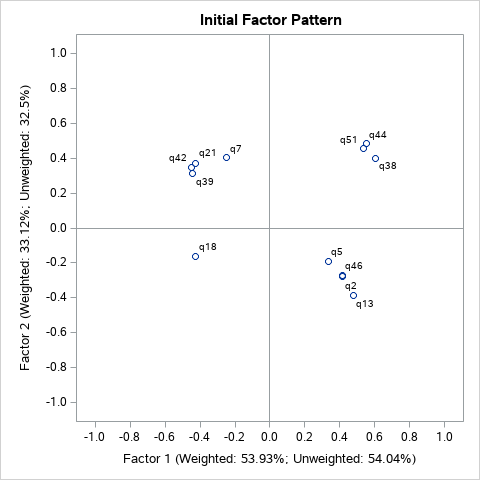
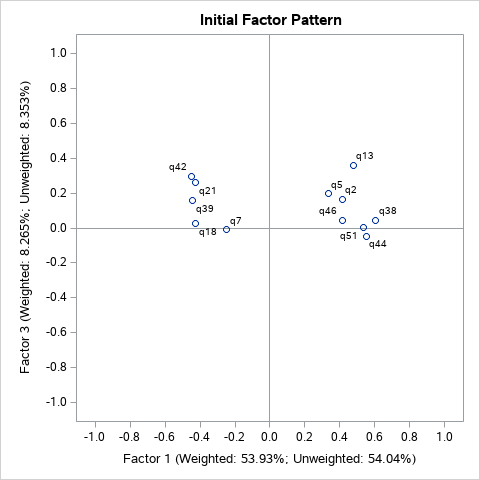
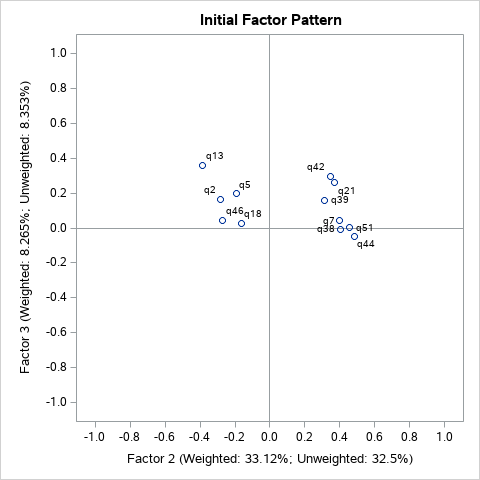
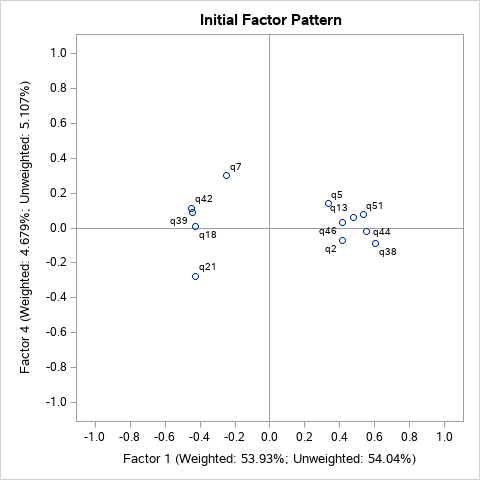
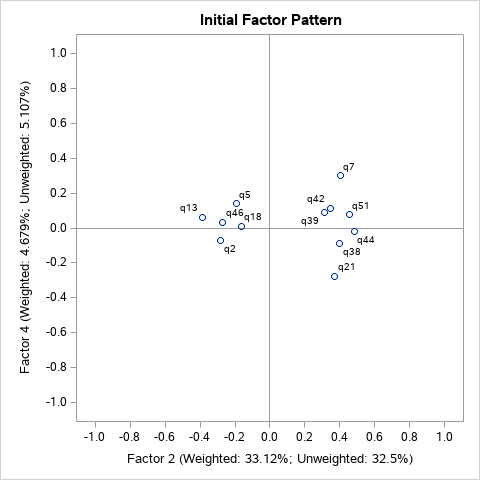
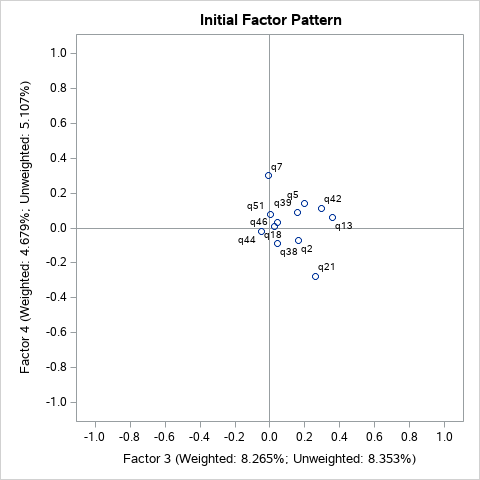
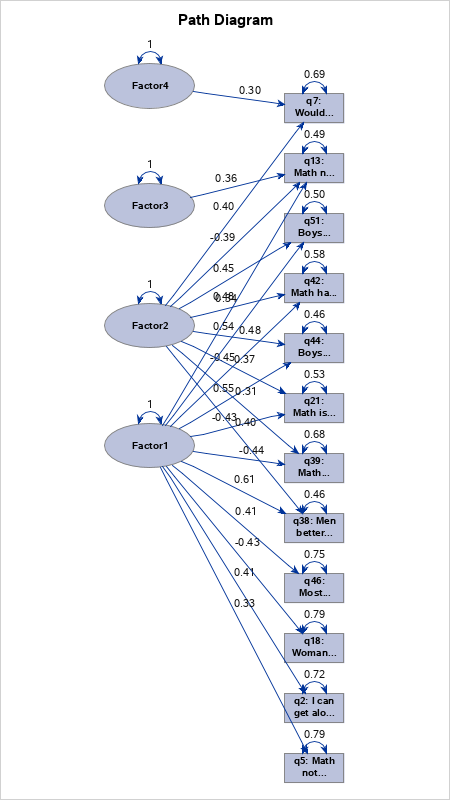

In [6]:
Ods select nobs PriorCommunalEst Eigenvalues ScreePlot  ConvergenceStatus
SignifTests FactorPattern InitPatternPlot PathDiagram  ;
proc factor data=dev out=dev1
plots=all m=ml nfactors=4;
var q2 q5 q7 q13 q18 q21 q38 q39 q42 q44 q46 q51;
run;

1. First table simply shows the number of observations analysed i.e. half of our original dataset
2. Second table shows the set of communality value i.e. the Rsquare of each variable against the other variables ­ which is quite low for all variables
3. Third table, suggests that we can probably explain the variance in this dataset using 2 ­ 4 variables. Eigenvalues after 4 are negative, and can be
ignored
4. The scree plot reinforces that possibly 4 factors can be used to explain the variance in our dataset, as the line is flat after factor 4.
5. Also, first two factors are the strongest in explaining this dataset
6. For the significance test, Pr > ChiSq <.0001 ­ we can reject the H0, that there is no common factors ­ which indicates that there is atleast one common
factor . Also our convergence is satisfied
7. Also, Pr > ChiSq = 0.0643, hence we can accept the hypothesis that the factors are sufficient for explaining the variance. Iterations were tried with
different Nfactor and it was observed that 4 is a sufficient numer of factors
8. Factor 1 has high loading on q38, q44 and q51 that explains about men and boys relative to mathematics and engineering
9. Factor 2 has high loading on q2, q5, q13, q46, that explains why maths might not be an important factor in jobs or life. Also, factor 3 has some
significant loading on q21 and q39, that explains the benefits of maths
10. Also questions like q18 and q46 doesn't really belong to any common factor, which might mean that people possibly answered these question
differently than other questions in the survey
11. The above common factors can also be visually explained in the pattern plots. Also, the plot 1 indicates that q18 doesn't belong to any common factor
12. Our Path diagram gives a very complicated representation of the structure we interpreted above.Hence, it's worth trying the rotated factors as they
might be cleaner!!

#### Rotated Factor Analysis


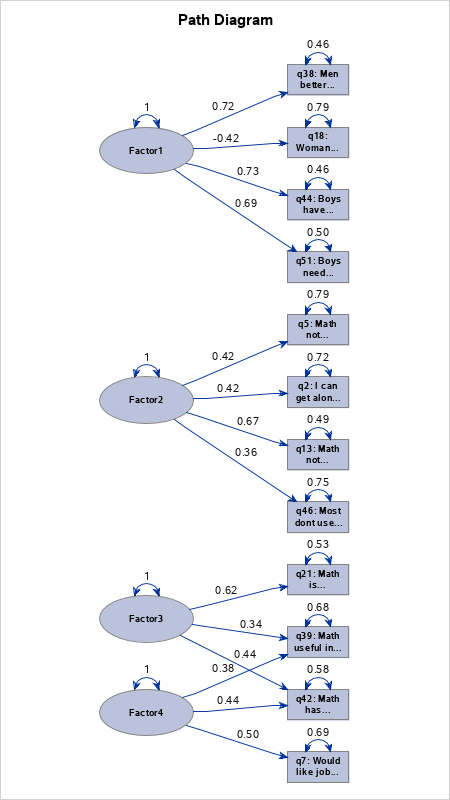

In [7]:
ods select OrthRotFactPat PathDiagram  ;
proc factor data=dev out=dev1
plots=all m=ml  nfactors=4 rotate=varimax;
var q2 q5 q7 q13 q18 q21 q38 q39 q42 q44 q46 q51;
run;

Above Rotated Factor Pattern and path diag gives us a clearer picture of the structure. Also, it can be noticed that correlation values for the rotated factors are stronger than non rotated.
The above structure derived from factor analysis can be confirmed using structural equaltion modelling on the validation dataset


## Structural Equation Modelling


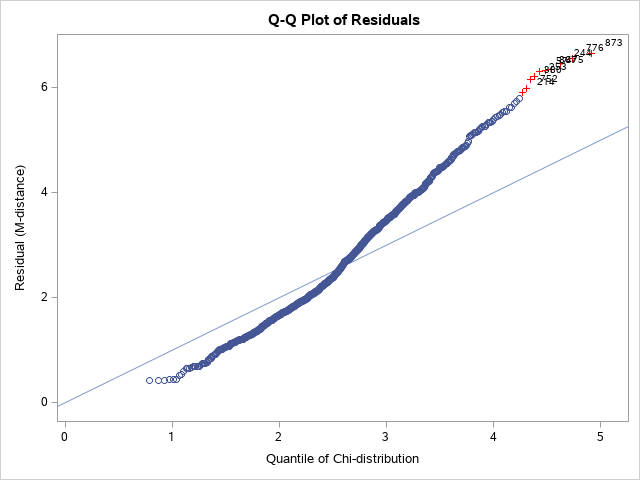
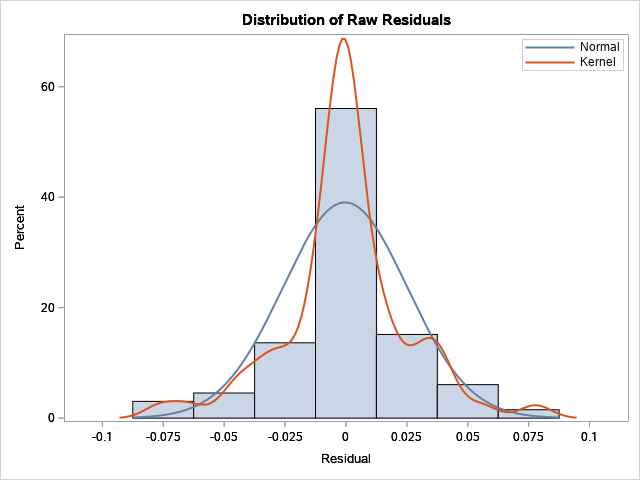
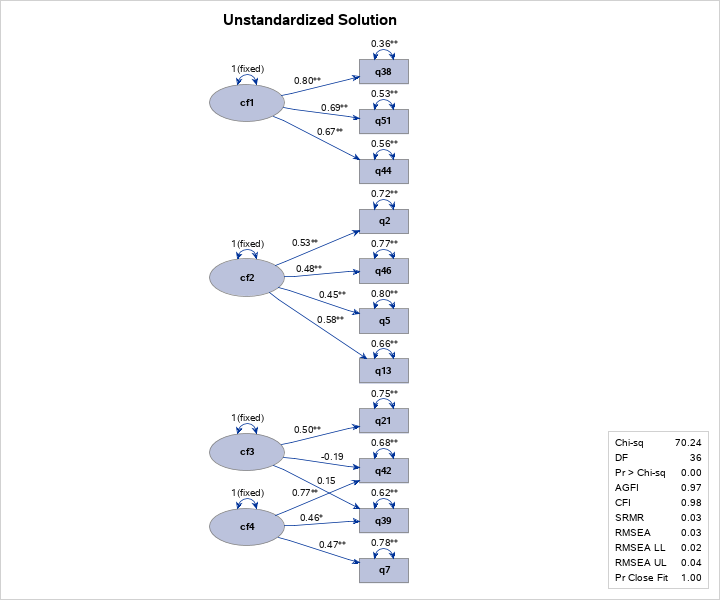

In [8]:
ods select ModelingInfo  PATHVariables ConvergenceStatus Fit
ResidualByQuantile RawResidualHistogram PATHListStd PATHCovVarsStd PathDiagram ;
proc calis data = val corr plots=(qq pp residual pathdiagram);
path cf1 ===> q38 q44 q51,
cf2 ===> q13 q5 q2 q46,
cf3 ===> q21 q39 q42,
cf4 ===> q7 q39 q42;
pvar cf1=1 , cf2=1, cf3=1, cf4=1;
run;

1. The above structural modelling is performed on validation dataset with 926 observations to confirm the structure derived from factor analysis.
2. Table 2 lists our manifest (variables that are given) and latent (variables that are interpreted from structure) variables
3. Convergence criteria is satisfies
4. Fit summary indicates a GFI (Goodness of Fit Index) is 0.9856 indicating a good fit
5. In Path list and variance parameters output Pr > |t| vales are significant, hence all the latent variables and manifest variables are able to explain the structure
6. Also, our path diag represents similar structure that was established with factor analysis. q38, q44 and q51 explains factor 1, and q2 q5 q13 and q46 explains factor2
7. Also both Factor 3 and factor 4 explains a common theme i.e. the benefits of maths in jobs and everyday life

## Comments 

The above analysis indicates that the survey was anwered by a mixture of three kind of students:
1. Students who think that being men is correlated to having better mathematical aptitude
2. Students who think that being good in mathematics has nothing to do with being successful and,
3. And students who simply think there are benefits of being good in maths in job and everyday life ­ without gender biasness.